In [109]:
from simpsom import plots as splots
from simpsom.neighborhoods import Neighborhoods
import numpy as np
import matplotlib as mpl
mpl.rcParams["text.usetex"] = True
mpl.rcParams["font.size"] = 14

In [110]:
nei = Neighborhoods(np, 10, 10, 'hexagons', PBC=False)
othernei = Neighborhoods(np, 6, 6, 'hexagons', PBC=True)
coords = nei.coordinates
othercoords = othernei.coordinates
indices = np.arange(len(coords))
outermask = (
    (indices // nei.height < 2) | 
    (indices // nei.height > nei.height - 3) | 
    (indices % nei.width < 2) | 
    (indices % nei.width > nei.width - 3)
)
grid1 = np.arange(nei.width * nei.height).reshape(nei.height, nei.width, order='F')
grid2  = np.arange(othernei.width * othernei.height).reshape(othernei.height, othernei.width, order='F')
theslice = slice(grid2.shape[0] - 2, grid2.shape[0] - 2 + grid1.shape[0])
grid1[:, :2] = np.tile(grid2[:, -2:].T, 3)[:, theslice].T
grid1[:, -2:] = np.tile(grid2[:, :2].T, 3)[:, theslice].T
grid1[:2, :] = np.tile(grid2[-2:, :], 3)[:, theslice]
grid1[-2:, :] = np.tile(grid2[:2, :], 3)[:, theslice]
grid1 = grid1.flatten(order='F')
grid1[~outermask] = grid2.flatten(order='F')

(0.7320507764816284, 7.062177658081055)

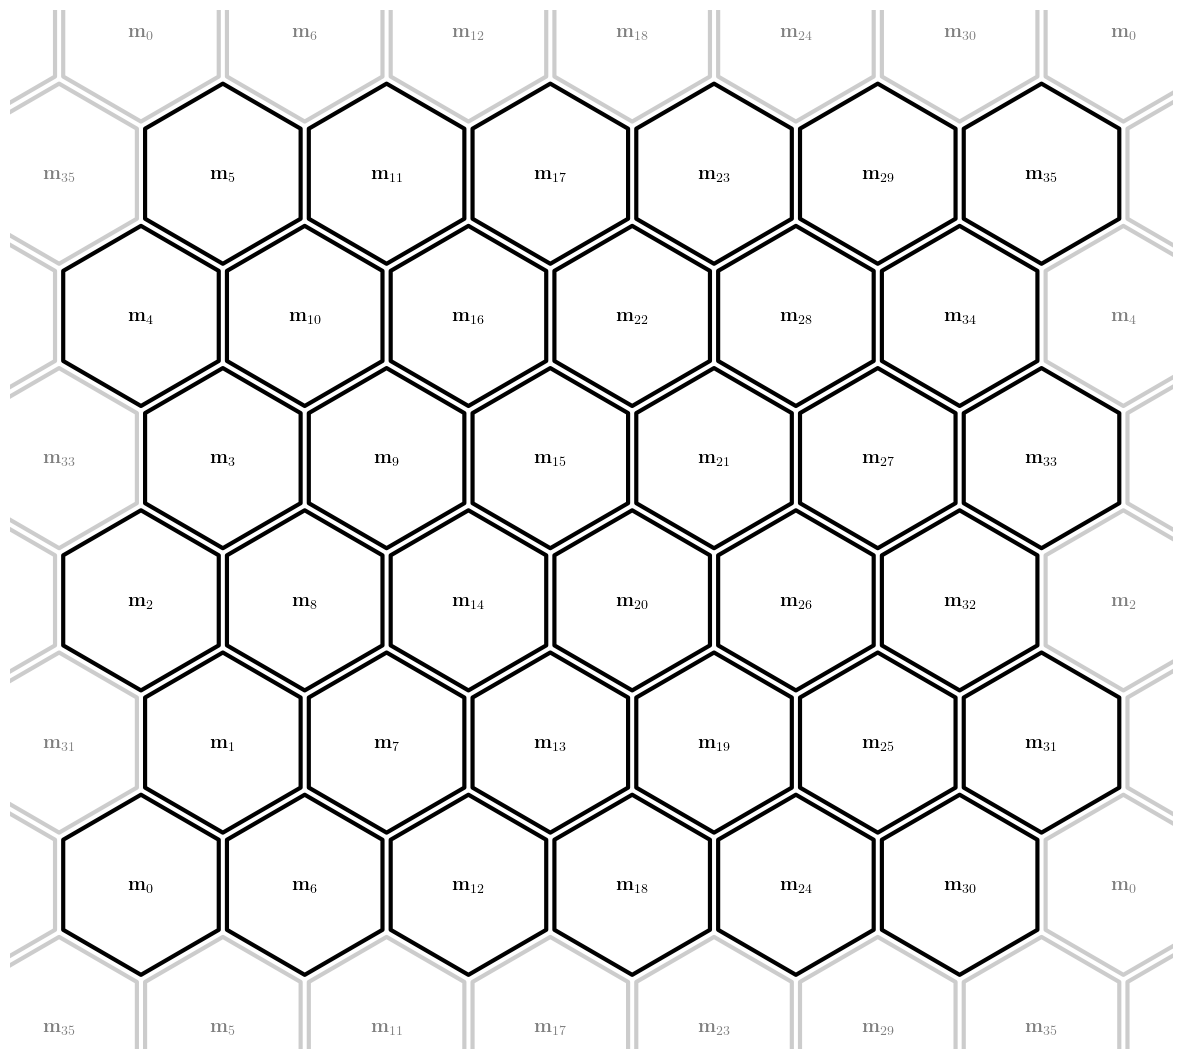

In [102]:
edgecolors = np.full(len(coords), 'black', dtype=object)
edgecolors[outermask] = 'gray'
alphas = np.ones(len(coords))
alphas[outermask] = 0.2
fig, ax = splots.plot_map(
    coords, np.ones(len(coords)), 'hexagons', 
    draw_cbar=False, figsize=(15, 13.5), 
    show=False, edgecolors = 'black', cmap='Greys',
    alphas=alphas, linewidths=3,
)
xlims = [np.amin(coords[~outermask][:, 0]) - 0.8, np.amax(coords[~outermask][:, 0]) + 0.8]
ylims = [np.amin(coords[~outermask][:, 1]) - 1, np.amax(coords[~outermask][:, 1]) + 1]
for i, c in enumerate(coords):
    x, y = c
    if x > xlims[0] and x < xlims[-1] and y > ylims[0] and y < ylims[-1]: 
        ax.text(x, y, r'$\mathbf{m}_{' + f'{grid1[i]}' + r'}$', va='center', ha='center', color=edgecolors[i])
ax.set_xlim(xlims)
ax.set_ylim(ylims)

In [103]:
traj

array([28, 30, 32])

In [156]:
segments = []
reps = []
traj = np.random.randint(low=0, high=35, size=20)
prev = coords[~outermask][traj[0]]
for i, j in enumerate(traj[1:]):
    ks = np.where(grid1==j)[0]
    distances = np.linalg.norm(prev[None, :] - coords[ks, :], axis=1)
    mindist = np.amin(distances)
    winnerks = ks[np.where(distances == mindist)[0]]
    next_ = coords[~outermask][j].copy()
    if np.all(outermask[winnerks]):
        winnerk = winnerks[0]
        segments.append(np.vstack([prev, coords[winnerk]]))
        ks = np.where(grid1==traj[i])[0]
        distances = np.linalg.norm(next_[None, :] - coords[ks, :], axis=1)
        mindist = np.amin(distances)
        winnerk2 = ks[np.where((distances == mindist) & outermask[ks])[0][0]]
        segments.append(np.vstack([coords[winnerk2], next_]))
        reps.append(2)
    else:
        segments.append(np.vstack([prev, next_]))
        reps.append(1)
    prev = next_.copy()

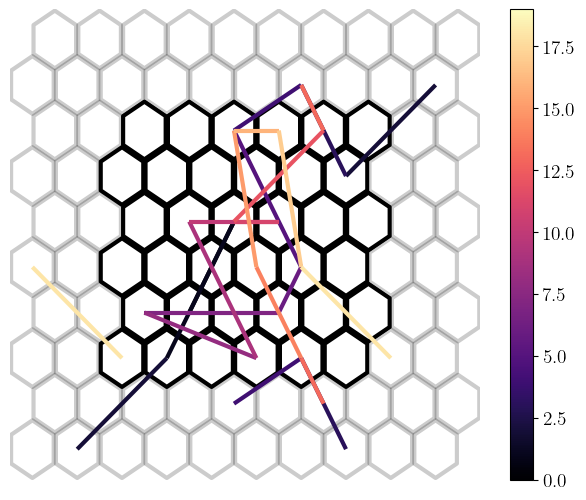

In [157]:
from plots import *
from matplotlib.collections import LineCollection

fig, ax = plt.subplots(figsize=(6, 6 * 0.8))
fig.subplots_adjust(left=0.01, right=0.99, bottom=0.01, top=0.99)
thesepops = np.sum(traj[:, None] == np.arange(36)[None, :], axis=0)
kwargs = dict(cmap=mpl.colormaps['gray_r'], norm=Normalize(0, np.amax(thesepops)))

fig, ax = splots.plot_map(
    coords, np.ones(len(coords)), 'hexagons', 
    draw_cbar=False, figsize=(15, 13.5), 
    show=False, edgecolors = 'black', cmap='Greys',
    alphas=alphas, linewidths=3, fig=fig, ax=ax
)

norm = Normalize(0, len(traj) - 1)
lc = LineCollection(segments, cmap='magma', norm=norm)
lc.set_array(np.repeat(np.arange(len(traj) - 1), repeats=reps))
lc.set_linewidth(3)
im = ax.add_collection(lc)
cbar = fig.colorbar(im)
# ax.set_xlim(xlims)
# ax.set_ylim(ylims)

In [132]:
prev = coords[~outermask][traj[0]]
next_ = coords[~outermask][traj[1]]

In [133]:
ks = np.where(grid1==traj[1])[0]

In [134]:
distances = np.linalg.norm(prev[None, :] - coords[ks, :], axis=1)

In [137]:
mindist = np.amin(distances)
winnerks = ks[np.where(distances == mindist)[0]]

In [139]:
ks

array([12, 18, 72, 78])

In [140]:
ks[outermask[ks]]

array([12, 18, 78])

In [5]:
traj = np.random.randint(low=0, high=35, size=92)

array([30, 32,  6, 10,  1, 24, 18,  9, 27,  5,  9, 18, 32, 11, 32,  3, 31,
       11, 17, 22, 12, 14, 12, 29, 17,  5, 19,  1,  4,  6,  8, 29, 17,  8,
       19,  6, 18, 25, 17, 23, 30, 15, 19, 32,  4,  0, 34, 14, 30, 13,  7,
       14, 19, 16, 21, 20, 24, 17, 13, 32, 14, 34, 18,  7, 18,  1,  0,  6,
       10, 11, 15, 10,  6,  4, 33, 11, 18,  3, 34, 13, 21, 29, 24, 22, 17,
       32, 18, 18,  4, 23, 10, 16])

(0.7320507764816284, 7.062177658081055)

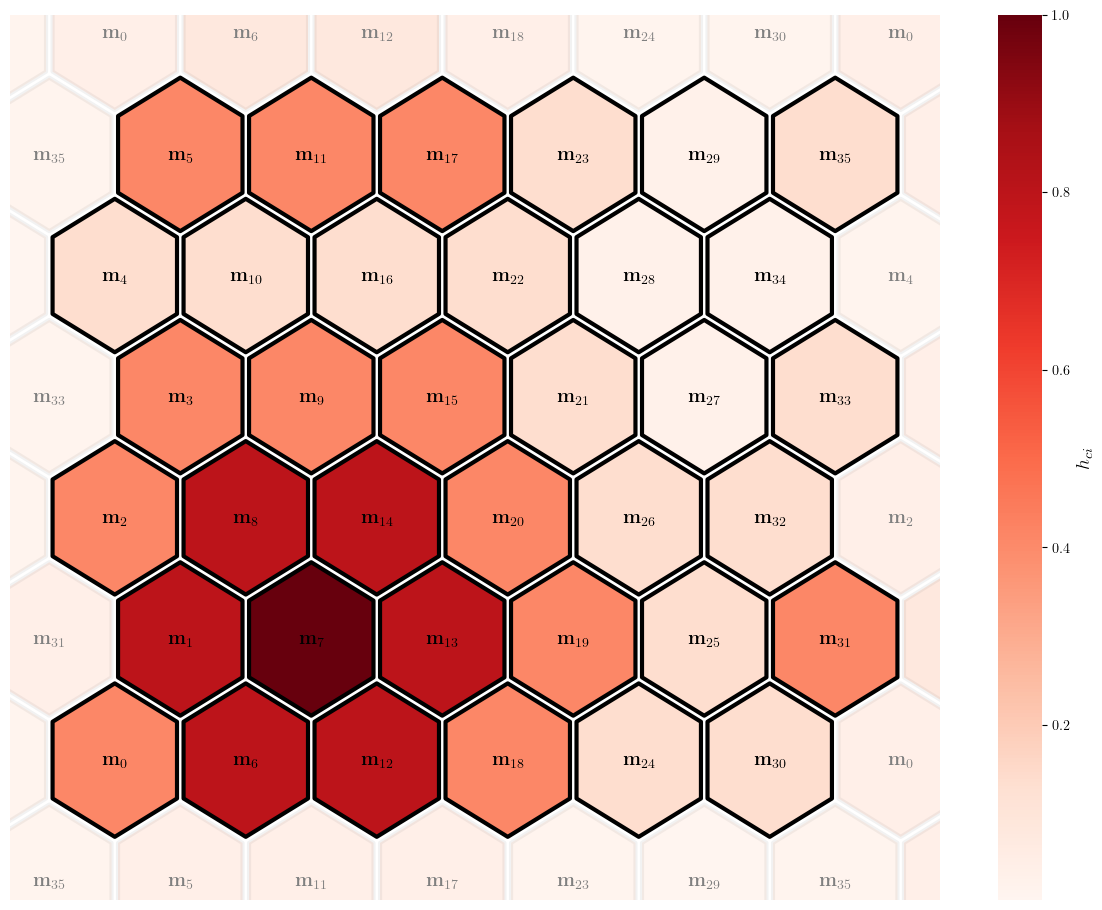

In [14]:
nei_caller = othernei.neighborhood_caller(7, 1.5, 'gaussian')[grid1]
nei_caller[outermask] /= 10
alphas[outermask] = 0.1
fig, ax = splots.plot_map(coords, nei_caller, 'hexagons', draw_cbar=True, figsize=(15, 11.5), show=False, edgecolors = edgecolors, cmap='Reds', cbar_label=r'$h_{ci}$', alphas=alphas, linewidths=3.)
xlims = [np.amin(coords[~outermask][:, 0]) - 0.8, np.amax(coords[~outermask][:, 0]) + 0.8]
ylims = [np.amin(coords[~outermask][:, 1]) - 1, np.amax(coords[~outermask][:, 1]) + 1]
for i, c in enumerate(coords):
    x, y = c
    if x > xlims[0] and x < xlims[-1] and y > ylims[0] and y < ylims[-1]: 
        t = r'$\mathbf{m}_{' + f'{grid1[i]}' + r'}$'
        ax.text(x, y, r'$\mathbf{m}_{' + f'{grid1[i]}' + r'}$', va='center', ha='center', color=edgecolors[i])
ax.set_xlim(xlims)
ax.set_ylim(ylims)

# Jet detection demo

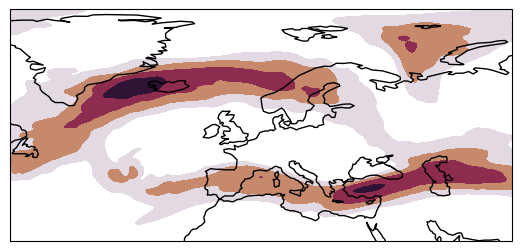

In [ ]:
clu = Clusterplot(1, 1, exp_wind.get_region())
da = da_abs
tsteps = np.random.randint(len(da), size=clu.nrow * clu.ncol)
lon, lat = da.lon.values, da.lat.values
_ = clu.add_contourf([da[t] for t in tsteps], cmap='twilight_shifted', cbar_label='Wind speed [m/s]', nlevels=7, transparify=3, draw_cbar=False)
plt.savefig('Figures/jet_detection_demo/raw.svg')

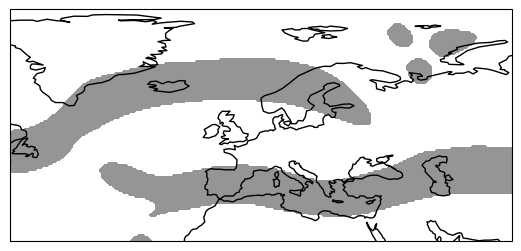

In [ ]:
clu = Clusterplot(1, 1, exp_wind.get_region())
clu.add_contourf([(frangi(da[t] / da[t].max(), black_ridges=False, sigmas=range(12, 23, 2), cval=0) > 0.15).astype(int) for t in tsteps], lon, lat, cmap='Greys', cbar_label='Wind speed [m/s]', nlevels=3, transparify=1, draw_cbar=False)

plt.savefig('Figures/jet_detection_demo/filtered.svg')

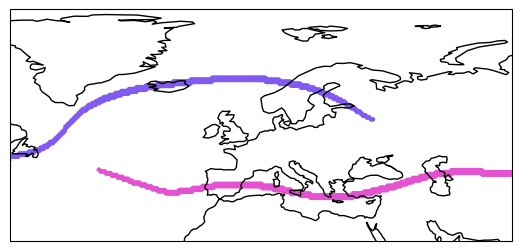

In [ ]:
clu = Clusterplot(1, 1, exp_wind.get_region())
color_jets = sns.cubehelix_palette(start=1., rot=1.5, light=.55, dark=.2, hue=2, n_colors=5)
for ax, t in zip(clu.axes, tsteps):
    X = da[t].values
    jets = find_jets_v4(da[t].values, lon, lat, height=0.12, cutoff=100)
    for k, jet in enumerate(jets):
        x, y, s = jet.T
        ax.scatter(x, y, s * 50, marker='.', lw=2, color=color_jets[k], alpha=1.0)
plt.savefig('Figures/jet_detection_demo/detected.svg')

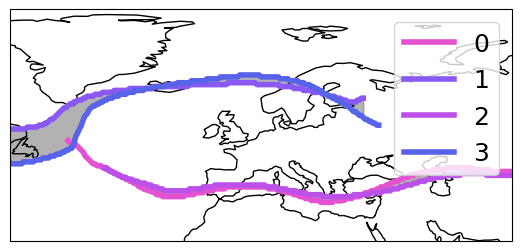

In [ ]:
clu = Clusterplot(1, 1, exp_wind.get_region())
ax = clu.axes[0]
color_jets = [sns.cubehelix_palette(start=1., rot=1.5, light=.55, dark=.2, hue=2, n_colors=10)[k] for k in [0, 2, 1, 3]]
jets = []
for it, t_ in enumerate([t - 2, t + 1]):
    X = da[t_].values
    jets.extend(find_jets_v4(X, lon, lat, height=0.12, cutoff=100))
for k, jet in enumerate(jets):
    x, y, s = jet.T
    ax.plot(x, y, lw=4, color=color_jets[k], alpha=1.0, label=k)
ax.legend()
for (i1, i2) in [(0, 2), (1, 3)]:
    common_x, idx_1, idx_2 = np.intersect1d(jets[i1][:, 0], jets[i2][:, 0], return_indices=True)
    ax.fill_between(common_x, jets[i1][idx_1, 1], jets[i2][idx_2, 1], color='grey', alpha=0.6)
plt.savefig('Figures/jet_detection_demo/detected_and_next.svg')

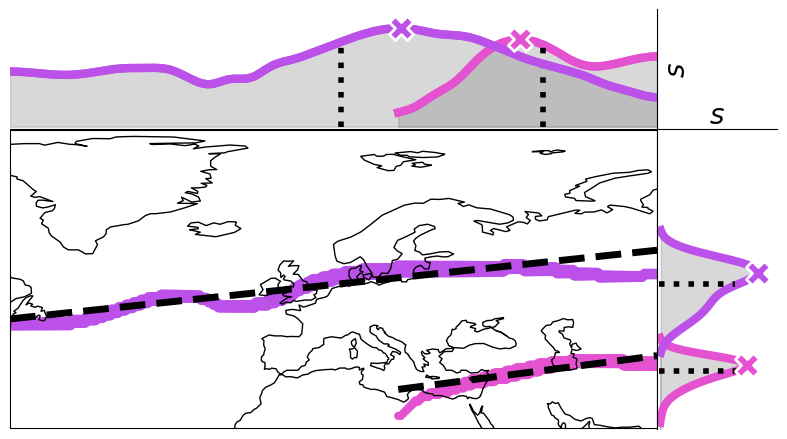

In [ ]:
plt.style.use('default')
SMALL_SIZE = 20
MEDIUM_SIZE = 20
BIGGER_SIZE = 22

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

def kde_estimate_jointplot(y, s):
    midpoints = np.arange(25.25, 85.25, .5)
    hist = np.histogram(y, weights=s, bins=np.arange(25, 85.5, .5))[0]
    kde_est = gaussian_kde(midpoints, weights=hist).evaluate(midpoints)
    mask = (kde_est > 0.001)
    return midpoints[mask], kde_est[mask] / kde_est[mask].max() * np.amax(s)

ratio = len(lon) / len(lat)
height = 3
extra_space = 1.2
figsize = (height * ratio + extra_space, height + extra_space)
fig = plt.figure(figsize=figsize)

gs = plt.GridSpec(2, 2, width_ratios=(height * ratio, extra_space), height_ratios=(extra_space, height), wspace=0, hspace=0, left=0, right=1, top=1, bottom=0)
ax = fig.add_subplot(gs[1, 0], projection=ccrs.PlateCarree())
ax.set_extent(
    exp_wind.get_region(),
    crs=ccrs.PlateCarree(),
)
ax.add_feature(COASTLINE)
# ax.gridlines(draw_labels=['left', 'bottom'])

ax_marg_x = fig.add_subplot(gs[0, 0], sharex=ax)
ax_marg_x.spines[['left', 'top']].set_visible(False)
ax_marg_x.set_xticks([])
ax_marg_x.set_yticks([])
ax_marg_x.set_ylabel('$s$')
ax_marg_x.yaxis.tick_right()
ax_marg_x.yaxis.set_label_position("right")
ax_marg_y = fig.add_subplot(gs[1, 1], sharey=ax)
ax_marg_y.spines[['bottom', 'right']].set_visible(False)
ax_marg_y.set_xticks([])
ax_marg_y.set_xlabel('$s$')
ax_marg_y.xaxis.tick_top()
ax_marg_y.set_yticks([])
ax_marg_y.xaxis.set_label_position("top")

color_jets = sns.cubehelix_palette(start=1., rot=1.5, light=.55, dark=.2, hue=2, n_colors=10)
X = da[t].values
jets = find_jets_v4(da[t].values, lon, lat, height=0.12, cutoff=100)
for k, jet in enumerate(jets):
    x, y, s = jet.T
    ax.scatter(x, y, s * 500, marker='.', lw=2, color=color_jets[k], alpha=1.0)
    p, r, _, _, _ = np.polyfit(x, y, w=s, deg=1, full=True)
    p = np.poly1d(p)
    # ax.vlines([x.min() - 0.5, x.max() + 0.5], y.min() - 0.5, y.max() + 0.5, color='grey', lw=3)
    # ax.hlines([y.min() - 0.5, y.max() + 0.5], x.min() - 0.5, x.max() + 0.5, color='grey', lw=3)
    ax.plot(x, p(x), color='black', lw=5, ls='--', label=f'{np.sum(s):.0f}')
    ax_marg_x.plot(x, s, color=color_jets[k], lw=6)
    smax = np.argmax(s)
    ax_marg_x.set_ylim([-0.02, 1.02])
    ax_marg_x.plot(x, s, color=color_jets[k], lw=6)
    ax_marg_x.fill_between(x, 0, s, color='gray', alpha=0.3)
    xbar = np.average(x, weights=s)
    sbar = s[np.argmin(np.abs(x - xbar))]
    ax_marg_x.plot([xbar, xbar], [0, sbar], color='black', lw=4, ls=':')
    ax_marg_x.scatter(x[smax], s[smax], s=300, marker='X', lw=2, c=[color_jets[k]], edgecolors='white', zorder=201)
    
    midpoits, kde_est = kde_estimate_jointplot(y, s)
    smax = np.argmax(kde_est)
    ax_marg_y.plot(kde_est, midpoits, color=color_jets[k], lw=6)
    ax_marg_y.fill_between(kde_est, 0, midpoits, color='gray', alpha=0.3)
    xbar = np.average(midpoits, weights=kde_est)
    sbar = kde_est[np.argmin(np.abs(midpoits - xbar))]
    ax_marg_y.plot([0, sbar], [xbar, xbar], color='black', lw=4, ls=':')
    ax_marg_y.set_xlim([-0.02, 1.02])
    ax_marg_y.scatter(kde_est[smax], midpoits[smax], s=300, marker='X', lw=2, c=[color_jets[k]], edgecolors='white', zorder=201)
plt.savefig('Figures/jet_detection_demo/properties.svg')